In [5]:
import numpy as np

In [6]:
import pandas as pd
%matplotlib inline


In [7]:
#Read in both parts of the Titanic dataset
my_df_1 = pd.read_csv("Titanic.csv")
my_df_2 = pd.read_csv("Titanic_II.csv")

print(my_df_1.shape)
print(my_df_2.shape)
%pwd

(891, 12)
(418, 12)


'C:\\Users\\Jordan Lian\\OneDrive - Northeastern University\\Spring 2021\\INFO 6101\\Module II'

In [8]:
my_df_2.shape

(418, 12)

In [9]:
# Get column names of your dataframe

print(my_df_1.columns)
print(my_df_2.columns)

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')
Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')


In [10]:
# Merge the two dataframes into the same dataframe using append
merged_df = my_df_1.append(my_df_2)
merged_df.shape

(1309, 12)

In [11]:
print(merged_df.columns)

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')


In [22]:
#Merge the two dataframes into the same dataframe using concat

df_list = [my_df_1,my_df_2]
merged_df_2 = pd.concat(df_list, axis = 0)
merged_df_2.shape

(1309, 12)

In [23]:
# Write out the merged dataframe as a .csv file

merged_df.to_csv("merged_data.csv",index = False)


In [6]:
# How can we define our own function and make new columns with derived data

def child_age(x):
    if x < 12:
        return "Child"
    elif x>12:
        return "Adult"
    else:
        return "unknown"

merged_df["Status"] = merged_df["Age"].apply(child_age)

merged_df.head()



,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Status
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,Adult
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,Adult
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Adult
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,Adult
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,Adult


In [7]:
merged_df[["Age","Status"]].head(n =7)

,Age,Status
0,22.0,Adult
1,38.0,Adult
2,26.0,Adult
3,35.0,Adult
4,35.0,Adult
5,NaN,unknown
6,54.0,Adult


In [8]:
# How to make summary statistics of a column
merged_df["Fare"].describe()

count    1308.000000
mean       33.295479
std        51.758668
min         0.000000
25%         7.895800
50%        14.454200
75%        31.275000
max       512.329200
Name: Fare, dtype: float64

In [10]:
# Make a dataframe by joining lists of data

Names = ["Jason","Laura","Johnson","Meuller","Anna"]

City = ["Seattle","San Francisco", "Portland", "Santa Cruz", "Athens"]

State = ["Washington", "California", "Oregon", "California", "Georgia"]

Income = [70000,80000,105000,45000,90000]

our_df = pd.DataFrame({"Name": Names, "City": City, 
                       "State": State, "Annual Income": Income})

our_df.head()

,Annual Income,City,Name,State
0,70000,Seattle,Jason,Washington
1,80000,San Francisco,Laura,California
2,105000,Portland,Johnson,Oregon
3,45000,Santa Cruz,Meuller,California
4,90000,Athens,Anna,Georgia


In [11]:
# Find and replace in our dataframe

rep_df = our_df.replace(to_replace = "California",
                        value = "CA",inplace = False)

rep_df.head()


,Annual Income,City,Name,State
0,70000,Seattle,Jason,Washington
1,80000,San Francisco,Laura,CA
2,105000,Portland,Johnson,Oregon
3,45000,Santa Cruz,Meuller,CA
4,90000,Athens,Anna,Georgia


In [ ]:
our_df.head()

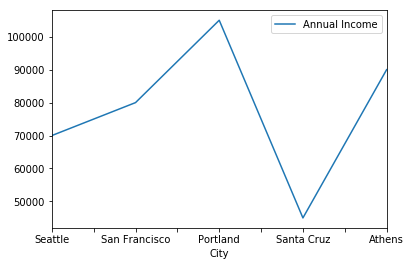

In [12]:
rep_df.plot(x = "City", y = "Annual Income", kind = "line")

# Drill Time !

Write a function that takes as input the fare, and if it's below 10, outputs "inexpensive", and if it's above 10 returns "expensive". Use this function to add a new column "Fare status" to your dataframe

In [27]:
# Fare Status

def fare(x):
    if x < 10:
        return "Inexpensive"
    elif x > 10:
        return "Expensive"
    else:
        return "Unknown"

merged_df["Fare Status"] = merged_df["Fare"].apply(fare)

merged_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Fare Status
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,Inexpensive
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,Expensive
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Inexpensive
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,Expensive
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,Inexpensive


Get all column names of your new dataframe

In [28]:
# get column names
merged_df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked', 'Fare Status'],
      dtype='object')

Write this dataframe to disk as a csv file

In [29]:
# data frame to disk as CSV file
merged_df.to_csv("pandas_II_exercise.csv",index = False)

Calculate summary statistics for the age column of your dataframe. What is the mean age ?

In [34]:
# Calculate summary statistics for the age column of your dataframe. 
merged_df["Age"].describe()


count    1046.000000
mean       29.881138
std        14.413493
min         0.170000
25%        21.000000
50%        28.000000
75%        39.000000
max        80.000000
Name: Age, dtype: float64

In [33]:
# What is the mean age?
merged_df.Age.mean()

29.881137667304014

What is the average age of passengers who travelled first class ?

In [16]:
first_class = merged_df.loc[merged_df['Pclass'] == 1]
first_class.Age.mean()

39.15992957746479

What is the average fare paid by passengers who travelled first class ?

In [39]:
first_class.Fare.mean()

87.5089916408668

Replace male by M and female by F in the dataframe

In [40]:

def gender(x):
    if x == 'male':
        return "M"
    else:
        return "F"

merged_df["Sex"] = merged_df["Sex"].apply(gender)
merged_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Fare Status
0,1,0,3,"Braund, Mr. Owen Harris",M,22.0,1,0,A/5 21171,7.2500,NaN,S,Inexpensive
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",F,38.0,1,0,PC 17599,71.2833,C85,C,Expensive
2,3,1,3,"Heikkinen, Miss. Laina",F,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Inexpensive
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",F,35.0,1,0,113803,53.1000,C123,S,Expensive
4,5,0,3,"Allen, Mr. William Henry",M,35.0,0,0,373450,8.0500,NaN,S,Inexpensive


Scatter plot fares against passenger Age

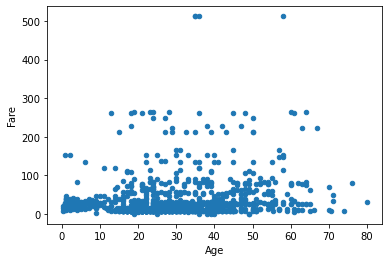

In [18]:
merged_df.plot(x = "Age", y = "Fare", kind = "scatter")